In [22]:
import pandas as pd
import numpy as np
import os

In [24]:
from data_src.basic_data_ingestion import CategoricalNumericalDataTypes, DataInspector, InfoInspectionOfData, DescribeTheData, DescribeNumericalData
from data_src.missingData_procedure import MissingValuesAnalysis
# from data_src.HandlingMissingDataColumn import HandlingMissingNumericalDataColumn, HandlingMissingCategoricalDataColumn, HandleMissingDataAnalyzerColumn
# from data_src.HandlingMissingDataRow import HandlingMissingNumericalDataRow, HandlingMissingCategoricalDataRow, HandleMissingDataAnalyzerRow
from data_src.univariate_analyse import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from data_src.bivariateAnalyze import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from data_src.multivariateAnalyse import SimpleMultivariateAnalysis

In [25]:
# Specify the directory containing extracted CSV files
extract_dir = "../extracted_data"  # Update this path if needed
csv_files = [f for f in os.listdir(extract_dir) if f.endswith('.csv')]

if not csv_files:
    raise FileNotFoundError("No CSV files found in the extracted data directory.")

print("Available CSV files:")
for i, csv_file in enumerate(csv_files):
    print(f"{i + 1}: {csv_file}")

# Get user input for which CSV file to use
choice = int(input("Select the CSV file to load (enter the number): ")) - 1
if choice < 0 or choice >= len(csv_files):
    raise ValueError("Invalid choice. Please select a valid CSV file number.")

data_path = os.path.join(extract_dir, csv_files[choice])
df = pd.read_csv(data_path)


Available CSV files:
1: AmesHousing.csv
2: titanic_toy.csv


In [26]:
# Method-1
# strategies = [
#         InfoInspectionOfData(),
#         DescribeTheData(),
#         DescribeNumericalData(),
#         CategoricalNumericalDataTypes(),
#         MissingValuesInspection()
        
#     ]
# # Initialize the DataInspector with the strategies
# inspector = DataInspector(strategies)

# # Execute the inspections
# inspector.execute_inspection(df)

# Method - 2
data_inspector = DataInspector(InfoInspectionOfData())
data_inspector.execute_inspection(df)


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-nu

In [27]:
data_inspector.set_strategy(strategy=CategoricalNumericalDataTypes())
data_inspector.execute_inspection(df)

Categorical Columns:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Numerical Columns:
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr

Missing percentage of numerical Data in the DataSet:/n
Lot Frontage       16.723549
Garage Yr Blt       5.426621
Mas Vnr Area        0.784983
Bsmt Half Bath      0.068259
Bsmt Full Bath      0.068259
BsmtFin SF 1        0.034130
Garage Cars         0.034130
Garage Area         0.034130
Total Bsmt SF       0.034130
Bsmt Unf SF         0.034130
BsmtFin SF 2        0.034130
Kitchen AbvGr       0.000000
3Ssn Porch          0.000000
Screen Porch        0.000000
Enclosed Porch      0.000000
Open Porch SF       0.000000
Wood Deck SF        0.000000
Pool Area           0.000000
Misc Val            0.000000
Mo Sold             0.000000
Yr Sold             0.000000
Fireplaces          0.000000
TotRms AbvGrd       0.000000
Order               0.000000
Bedroom AbvGr       0.000000
Half Bath           0.000000
Full Bath           0.000000
PID                 0.000000
Gr Liv Area         0.000000
Low Qual Fin SF     0.000000
2nd Flr SF          0.000000
1st Flr SF          0.000000
Year Remod/Add   

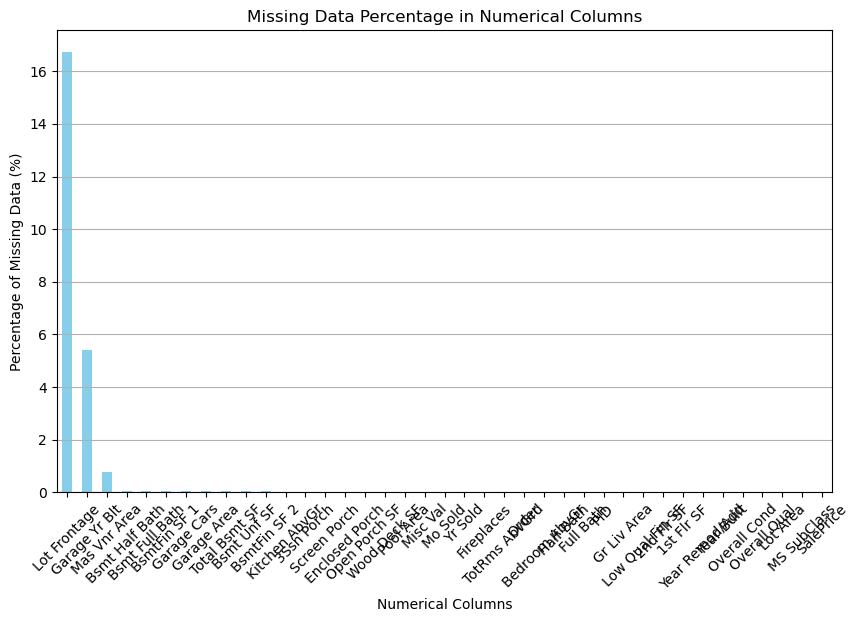

In [28]:
missing_values_analyzer = MissingValuesAnalysis()
missing_values_analyzer.num_analyse(df)

Missing percentage of Categorical Data in the DataSet:/n
Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Electrical         0.034130
Kitchen Qual       0.000000
Central Air        0.000000
Functional         0.000000
Heating QC         0.000000
Heating            0.000000
Paved Drive        0.000000
Sale Type          0.000000
MS Zoning          0.000000
Street             0.000000
Condition 2        0.000000
Lot Shape          0.000000
Land Contour       0.000000
Utilities          0.000000
Lot Config         0.000000
Land Slope         0.000000
Neighborhood       0.000000
Condition 1        0.000000
Bldg Type          

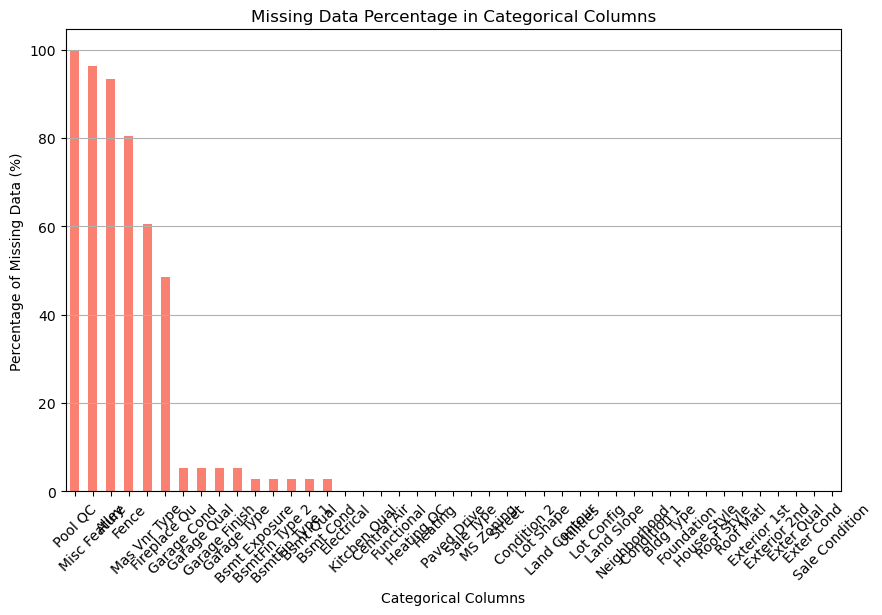

In [29]:
missing_values_analyzer.cat_analyse(df)
# or 
# missing_values_analyzer.cat_missing_data(df)
# missing_values_analyzer.cat_plot(df)


# Missing Values Insights

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` have substantial yellow, indicating that these features have missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.

# Insights 


#### **1. Data Types and Non-null Counts:**
- The dataset contains **2930 entries** and **82 columns**.
- **Data Types**: There are 11 columns with `float64` data type, 28 columns with `int64` data type, and 43 columns with `object` data type.
  - **Numerical Features**: These include features like `Lot Frontage`, `Lot Area`, `Overall Qual`, `Year Built`, etc.
  - **Categorical Features**: Features like `MS Zoning`, `Street`, `Neighborhood`, `Bldg Type`, etc., are categorical.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `SalePrice` has a mean of **$180,796** with a standard deviation of **$79,886**, indicating a significant spread in house prices.
  - `Overall Qual` (quality of the house) ranges from **1 to 10**, with a mean of **6.09**, showing a relatively high quality on average.
  - `Year Built` ranges from **1872 to 2010**, indicating that the dataset includes both very old and relatively new houses.
  - `Lot Area` has a wide range, with some extreme outliers (maximum of **215,245 sq ft**), which might indicate large properties.
  - The distribution of `Gr Liv Area` (above ground living area) shows a mean of **1499 sq ft** with a wide range, which could significantly impact `SalePrice`.

- **Categorical Features**:
  - **Neighborhood** has **28 unique values**, with `NAmes` being the most common, suggesting some neighborhoods might dominate the dataset.
  - **MS Zoning** is mostly `RL` (residential low-density), with **7 unique zoning types**.
  - `Alley` has a high frequency of missing values (discussed below).
  - Several features related to basements, garages, and exterior quality vary significantly, which will be crucial in predicting `SalePrice`.

#### **3. Missing Values Analysis:**
- **Columns with Significant Missing Values**:
  - `Alley` has **2732 missing values** (93.4% missing), making it almost unusable without imputation or transformation.
  - `Pool QC` (pool quality) has **2917 missing values** (99.5% missing), indicating that very few houses have pools.
  - `Fence` has **2358 missing values** (80.5% missing), suggesting that many houses do not have a fence or it was not recorded.
  - `Misc Feature` has **2824 missing values** (96.4% missing), indicating that most houses do not have miscellaneous features, or they were not recorded.

- **Columns with Moderate Missing Values**:
  - `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` each have **159 missing values** (~5.4%), likely corresponding to houses without garages.
  - `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` each have **around 80 missing values** (~2.7%), likely representing houses without basements.
  - `Mas Vnr Type` (masonry veneer type) has **1775 missing values** (~60.6%), and `Mas Vnr Area` has **23 missing values**. This might indicate many houses do not have masonry veneer.

- **Single Missing Values**:
  - Several features, such as `BsmtFin SF 1`, `Total Bsmt SF`, `Electrical`, `Garage Cars`, `Garage Area`, etc., have only one or two missing values, which can likely be imputed without much impact.

### **Issues to be Addressed Later**

1. **Handling Missing Data:**
   - **Significant Missing Values**: Columns like `Alley`, `Pool QC`, `Fence`, and `Misc Feature` have a very high percentage of missing data. Decisions need to be made whether to:
     - Drop these columns entirely, as they might not add significant value.
     - Impute missing values with a placeholder (e.g., "None" or "No Pool") to retain them in the analysis.
   - **Moderate Missing Values**: Features related to basements and garages will require careful handling. Missing values could be filled with "No Basement" or "No Garage" for categorical features, and zeros for numerical ones.
   - **Single Missing Values**: These can likely be filled with the mode or mean for categorical and numerical features, respectively.

2. **Outlier Detection and Handling**:
   - Features like `Lot Area`, `Gr Liv Area`, and `SalePrice` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.

3. **Categorical Encoding**:
   - Categorical features like `Neighborhood`, `MS Zoning`, `Bldg Type`, and `Exterior 1st` have many unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, label encoding, or frequency encoding) based on their relationship with the target variable.

4. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

5. **Correlation and Multicollinearity**:
   - Initial correlation analysis suggests that some features might be highly correlated with each other (e.g., basement-related features). This could lead to multicollinearity issues, which need to be addressed during feature selection.

In [11]:
handle_col=HandleMissingDataAnalyzerColumn(strategy=HandlingMissingNumericalDataColumn())
df=handle_col.execute_analysis(df=df)

Numerical Data Columns: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Columns dropped: ['Lot Frontage', 'Garage Yr Blt']
New DataFrame shape after dropping columns: (2930, 80), Original shape: (2930, 82)


In [12]:
handle_col.set_strategy(HandlingMissingCategoricalDataColumn())
df=handle_col.execute_analysis(df=df)

Categorical Data Columns: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
Columns dropped: ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
New DataFrame shape after dropping columns: (2930, 74), Original shape: (2930, 80)


In [30]:
df.shape

(2930, 82)

Numerical Data Columns: ['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
New DataFrame shape after dropping rows: (2904, 74), Original shape: (2930, 74)


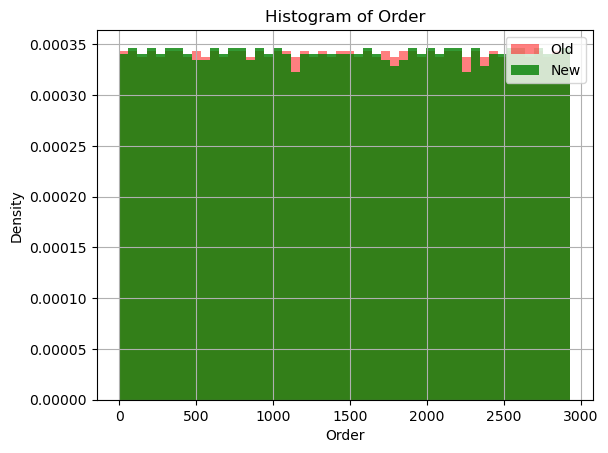

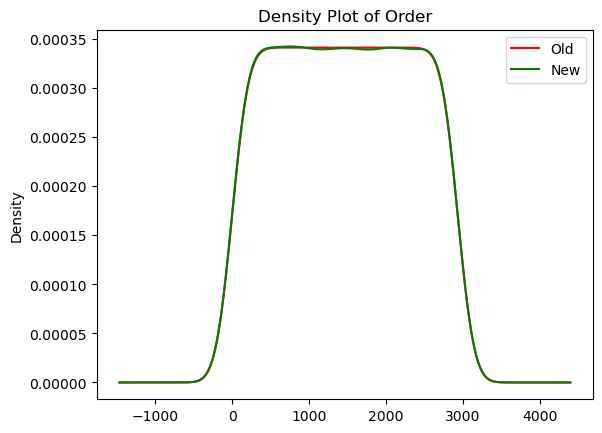

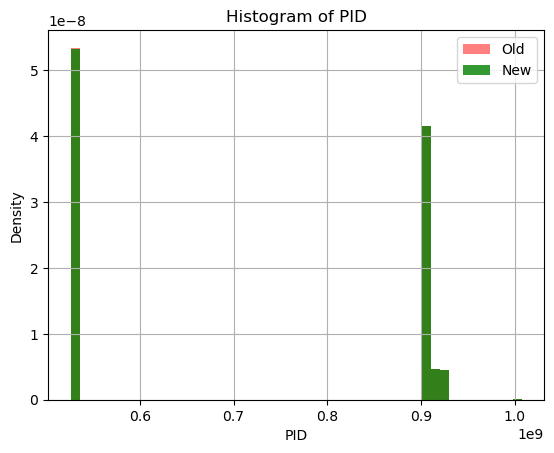

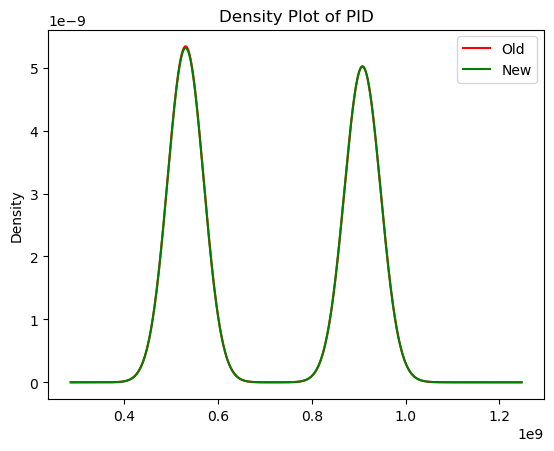

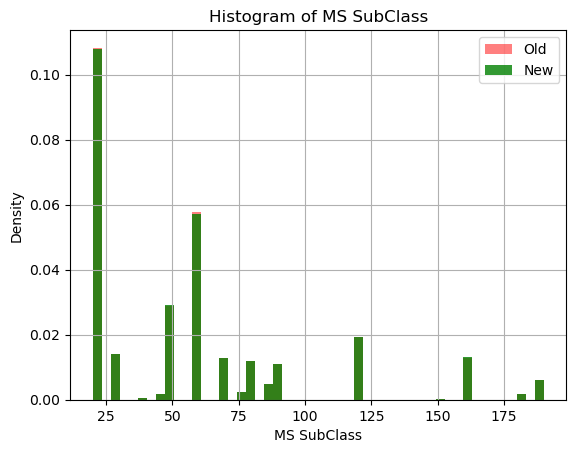

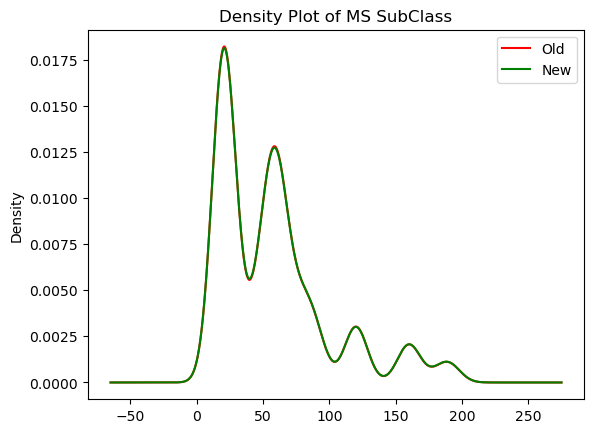

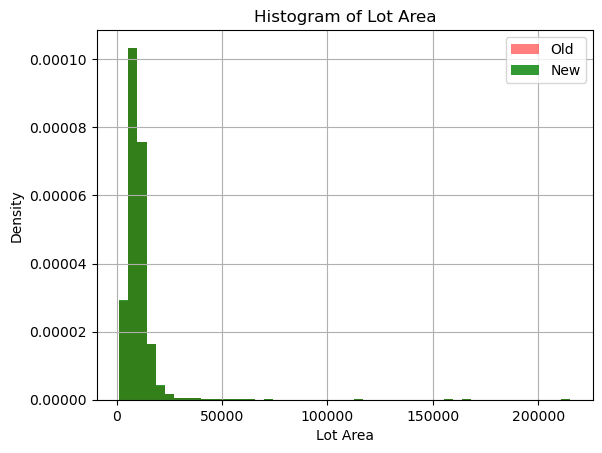

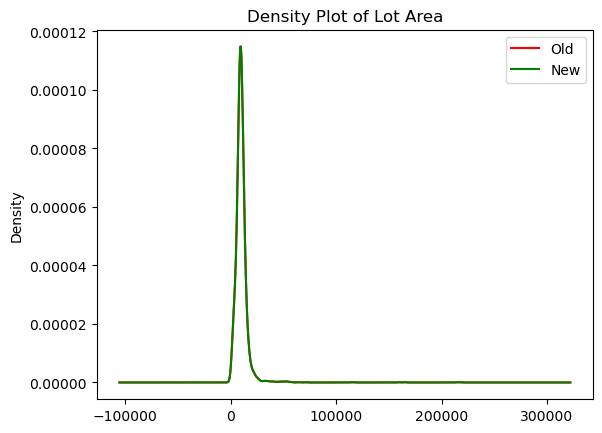

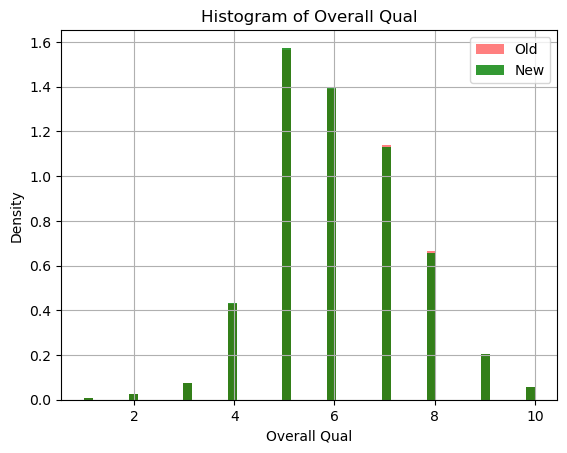

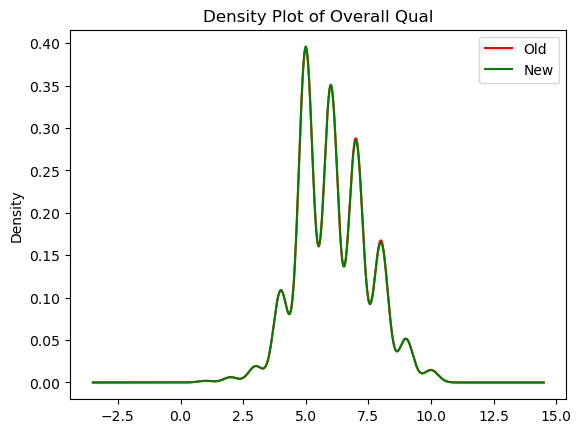

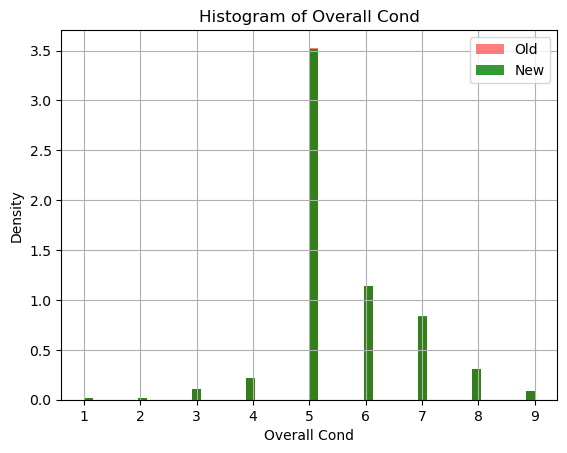

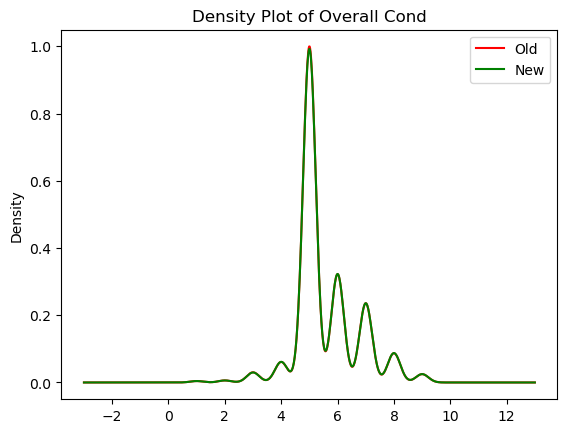

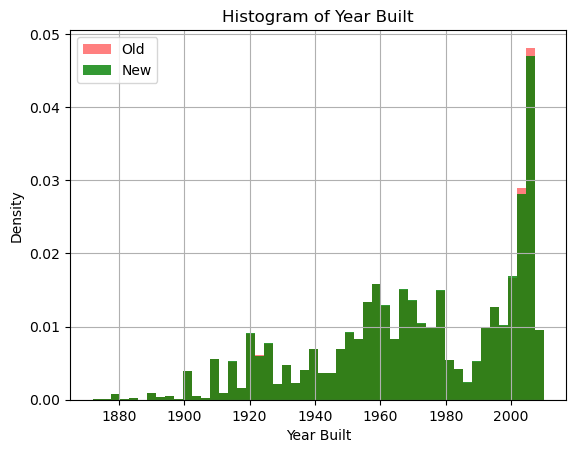

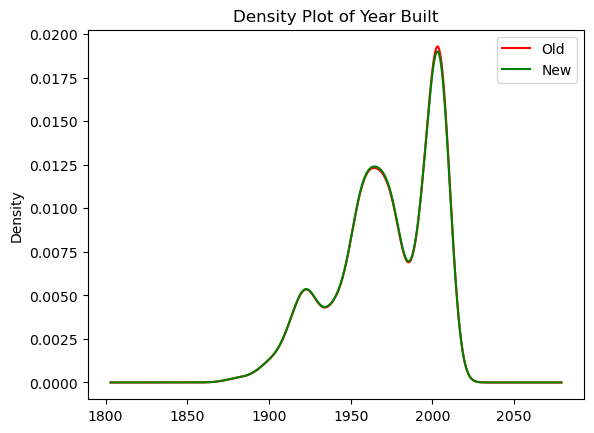

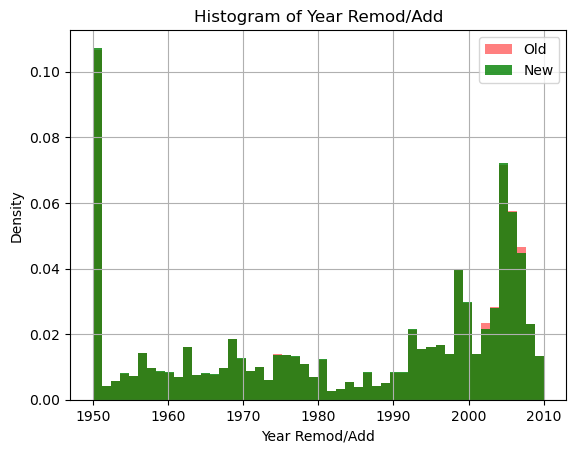

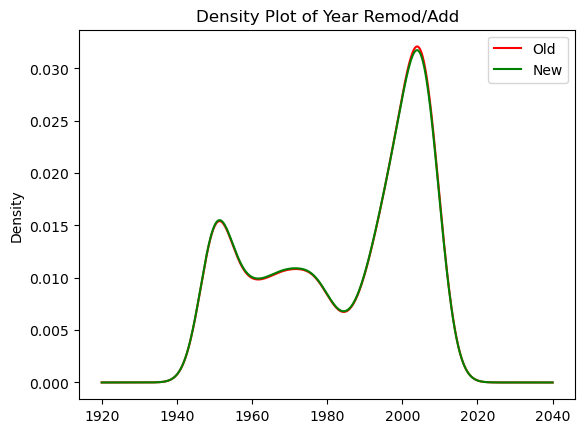

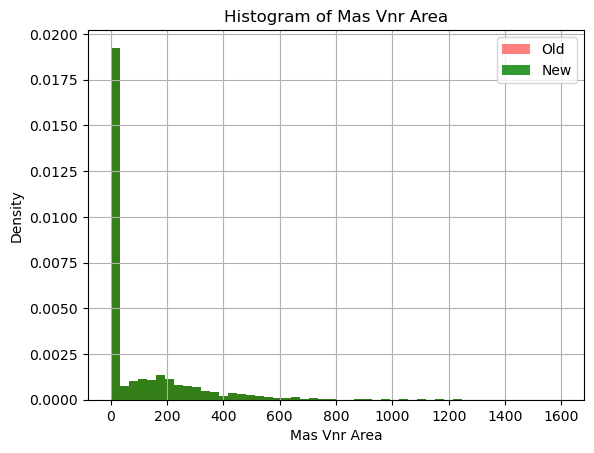

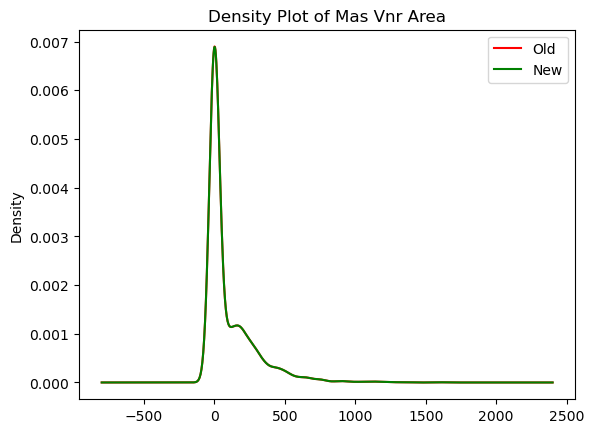

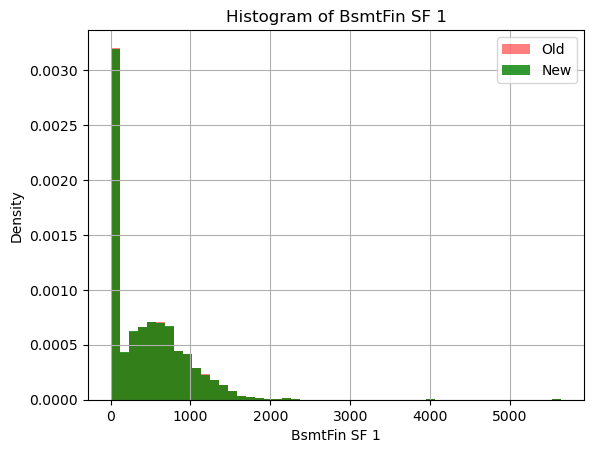

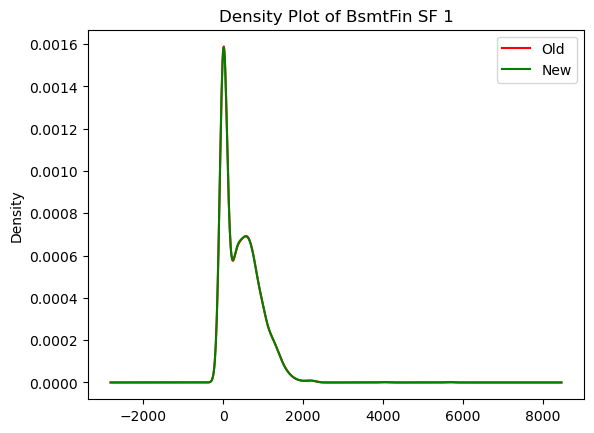

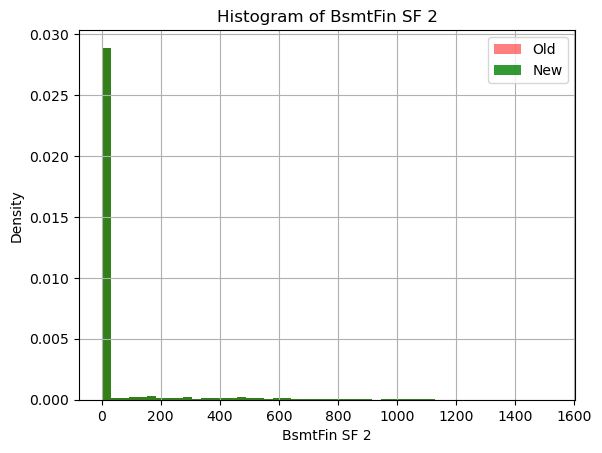

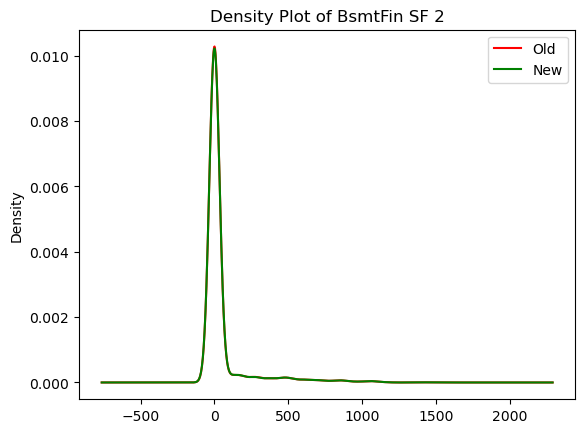

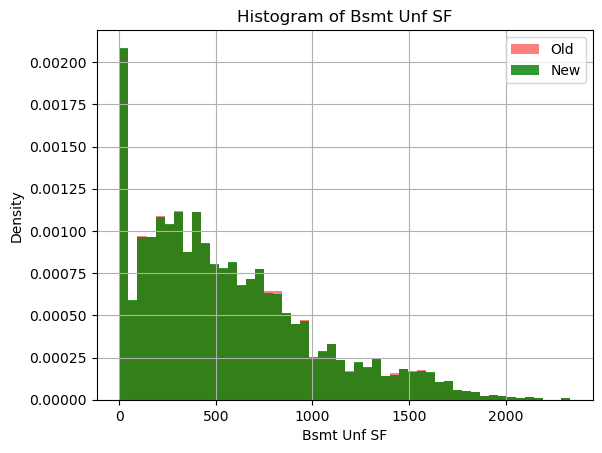

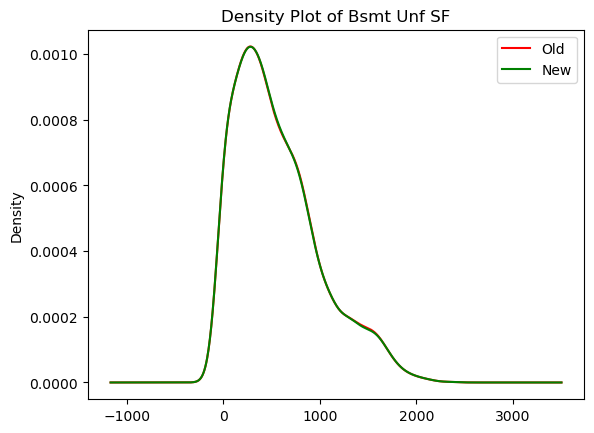

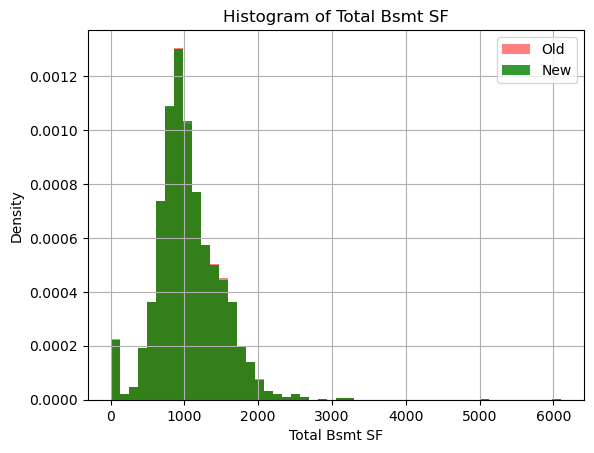

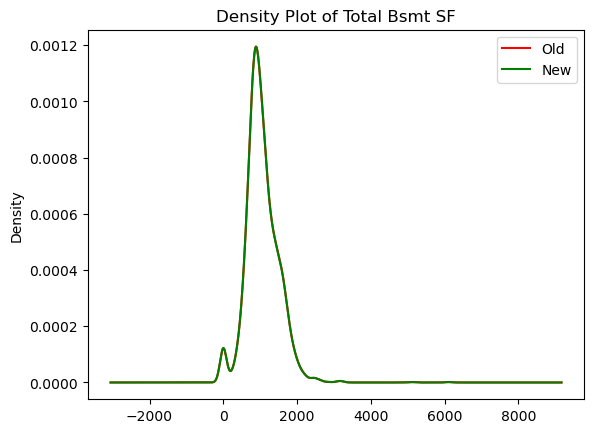

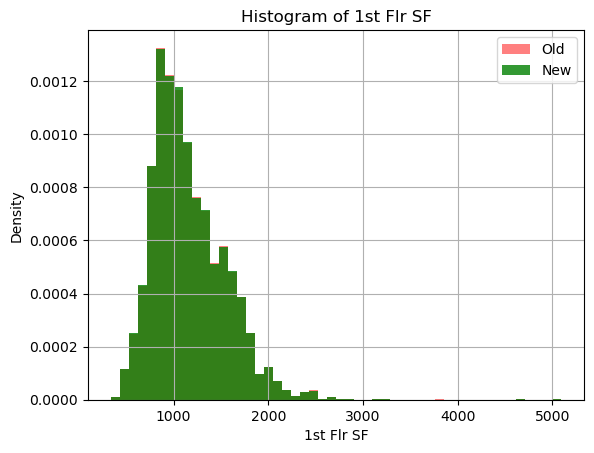

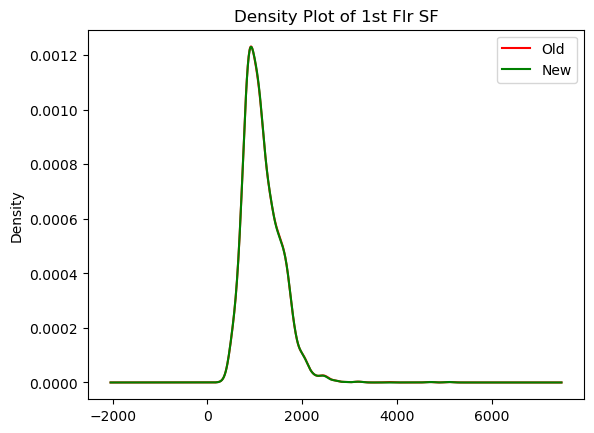

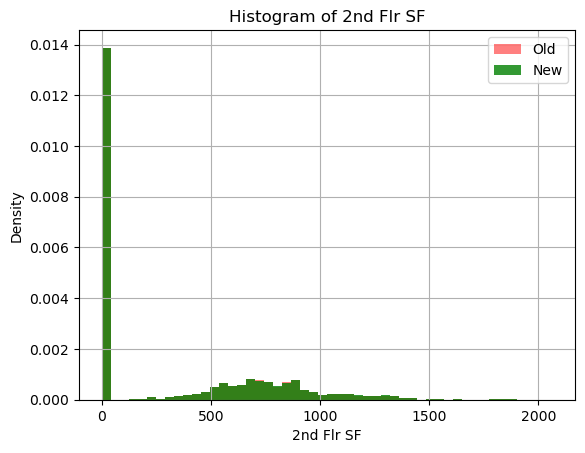

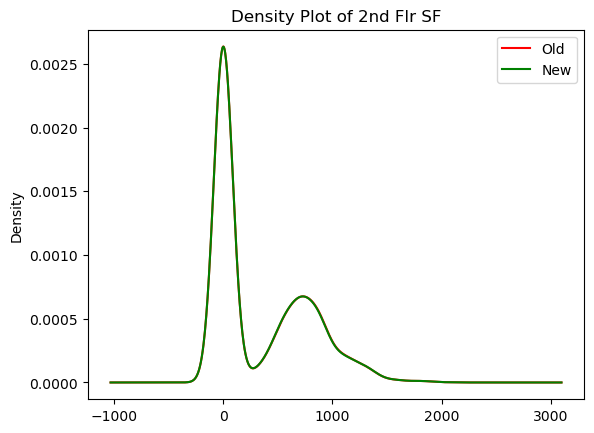

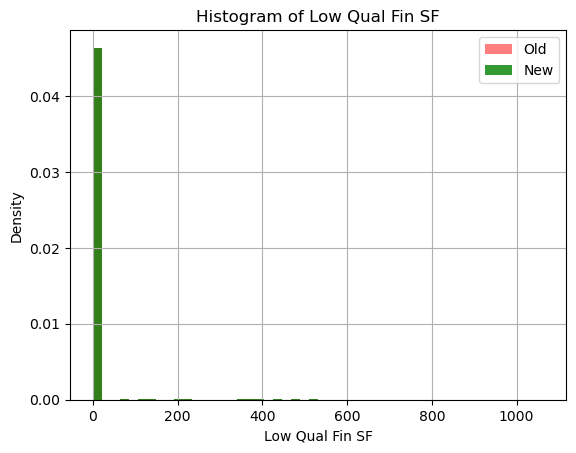

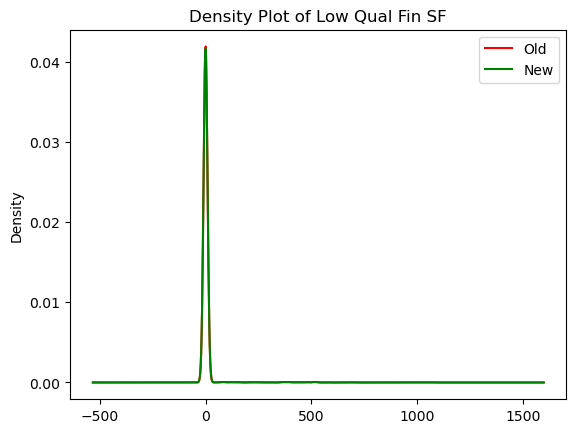

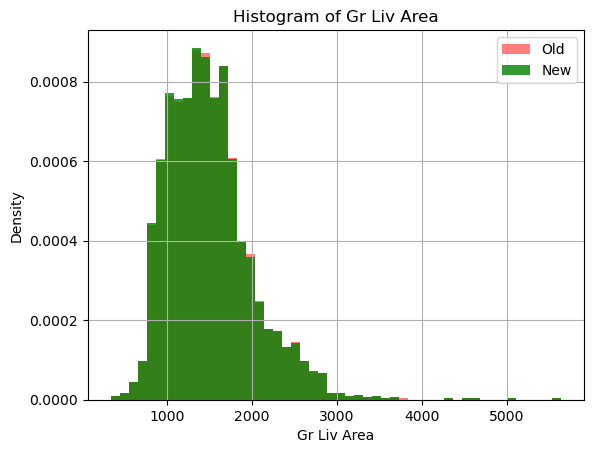

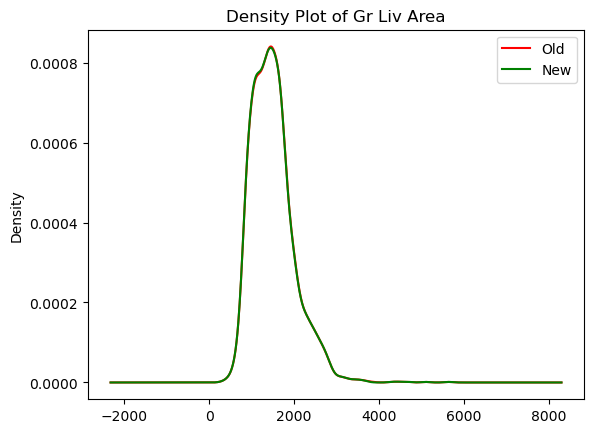

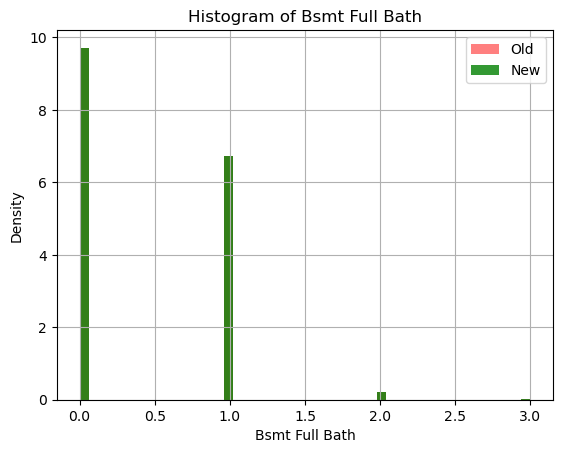

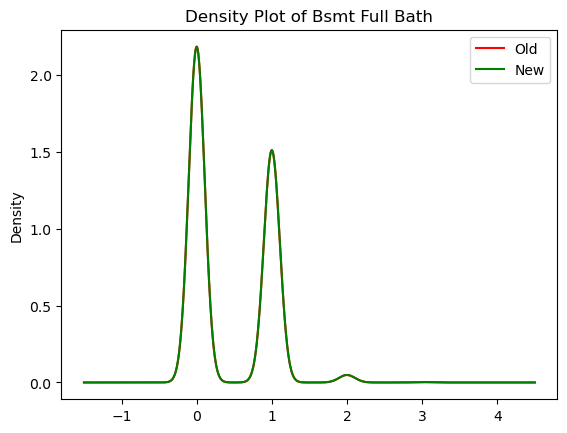

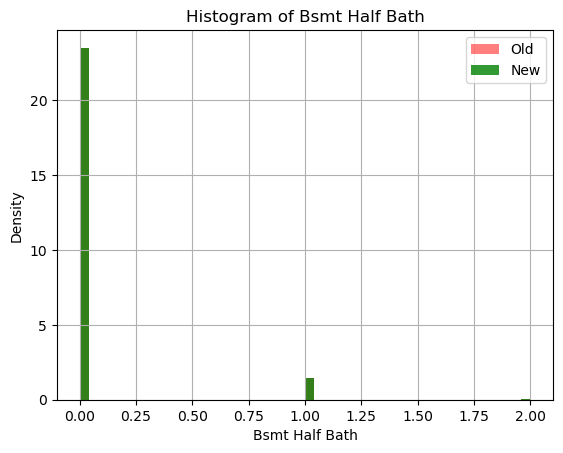

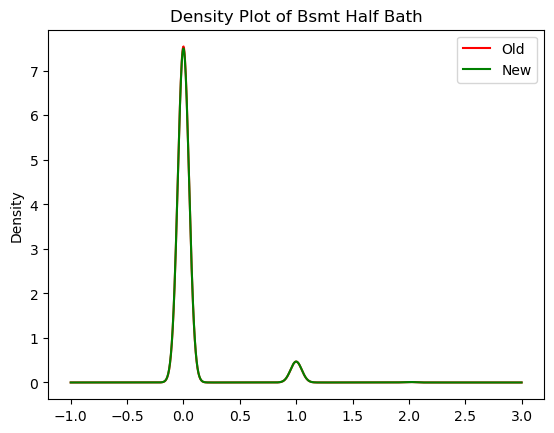

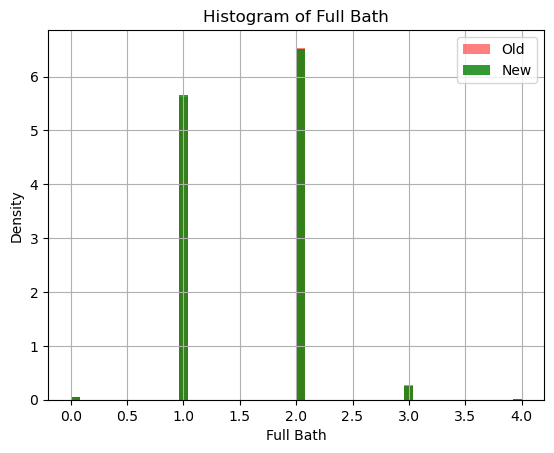

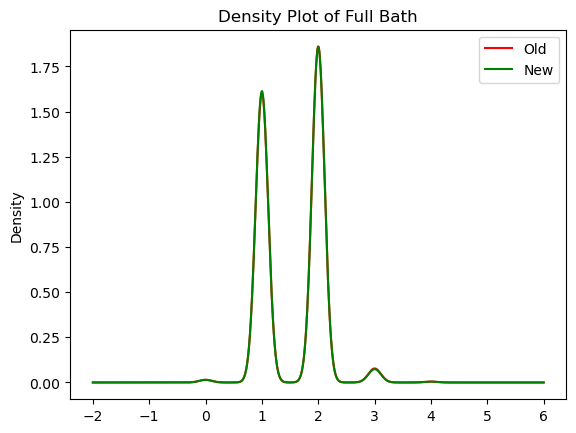

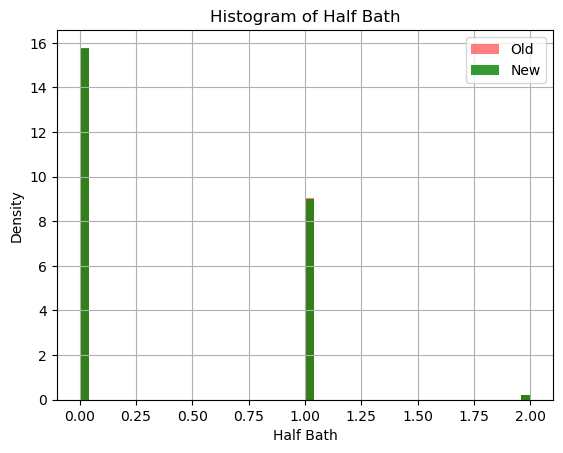

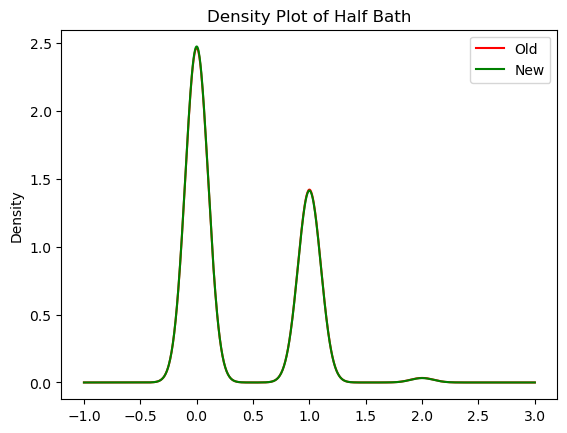

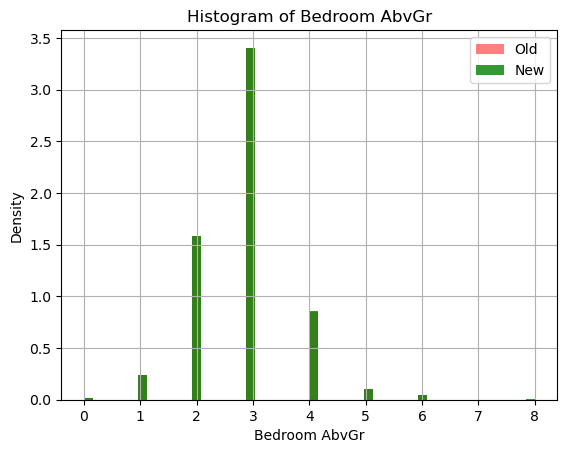

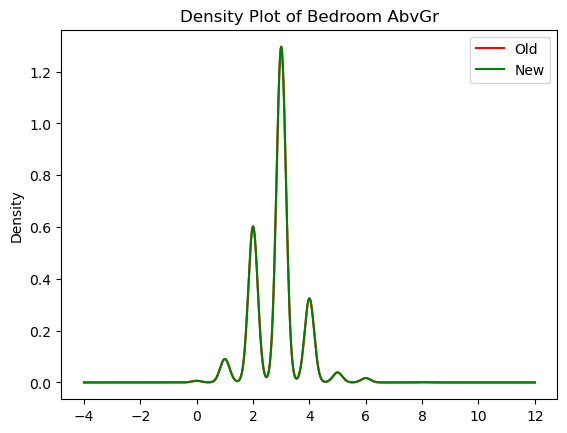

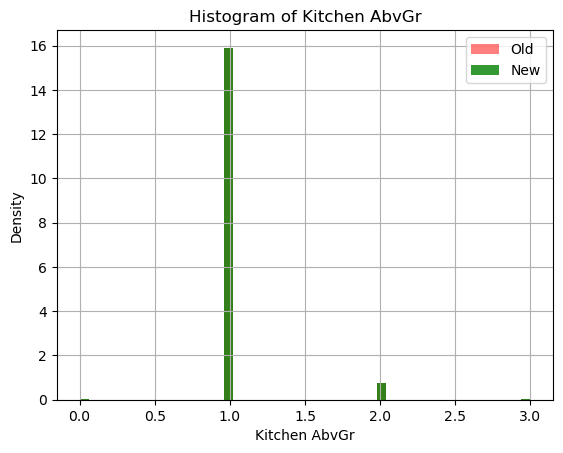

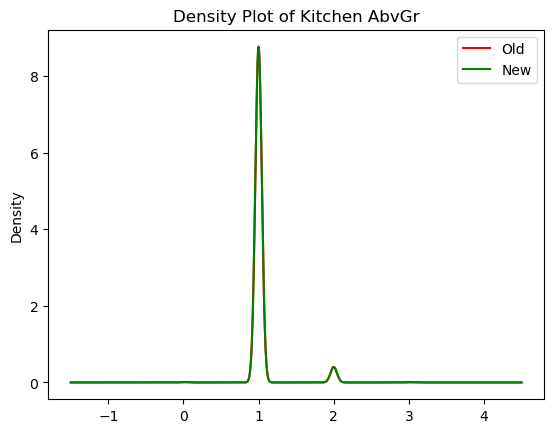

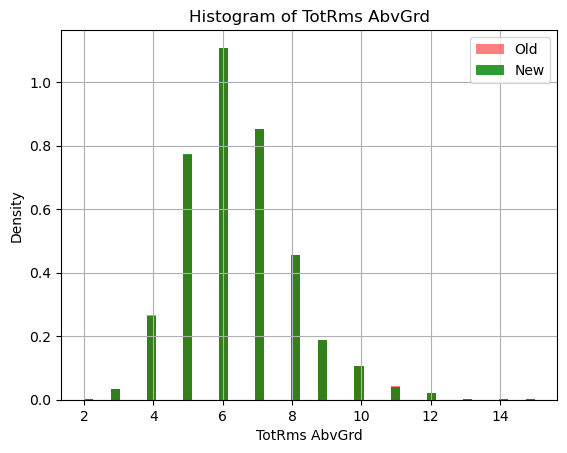

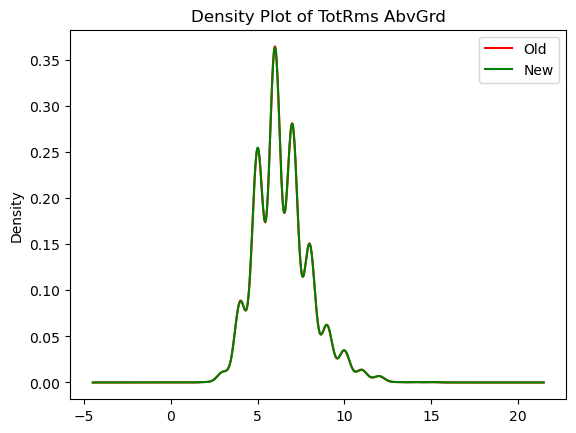

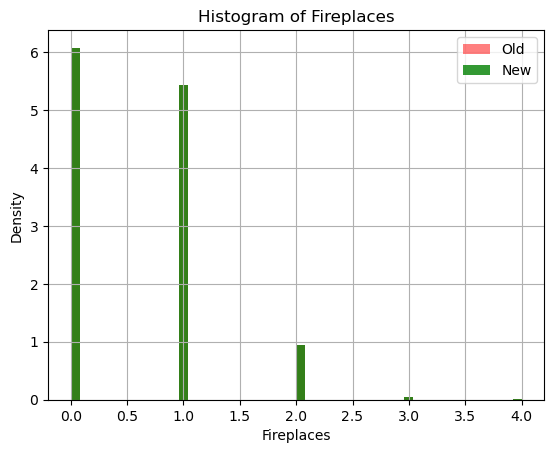

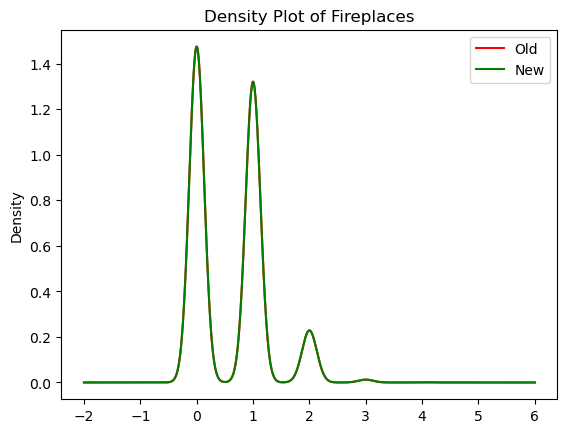

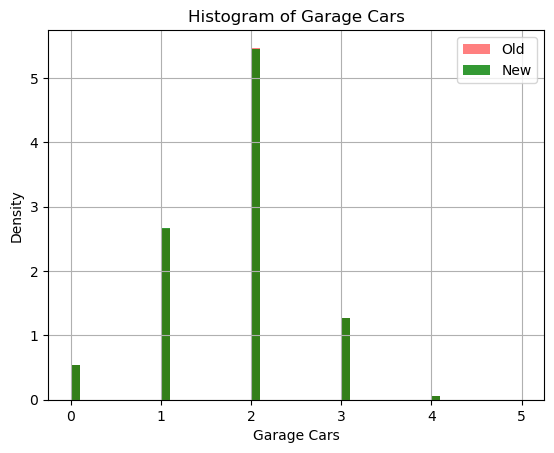

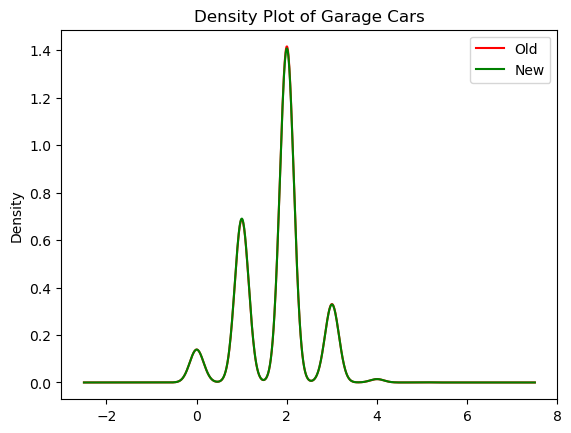

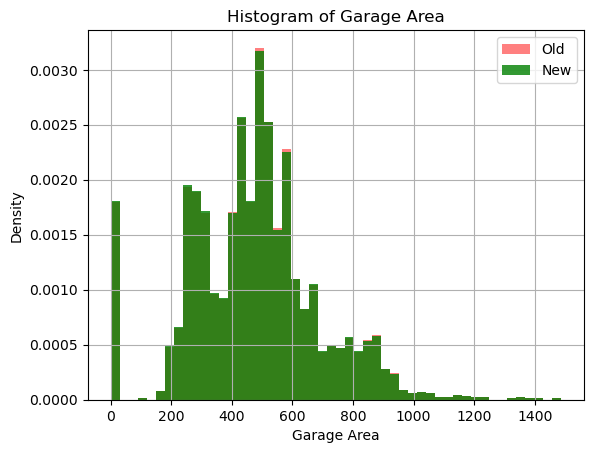

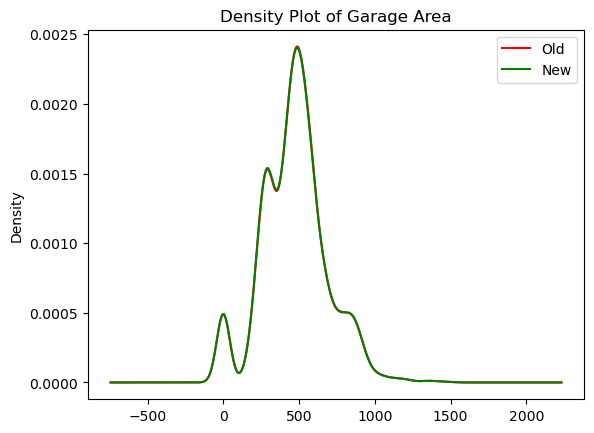

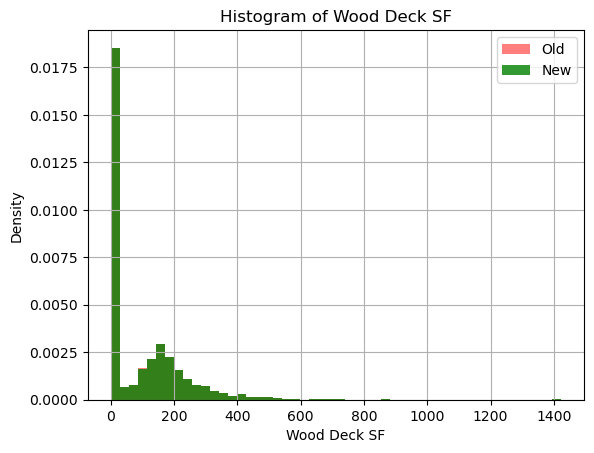

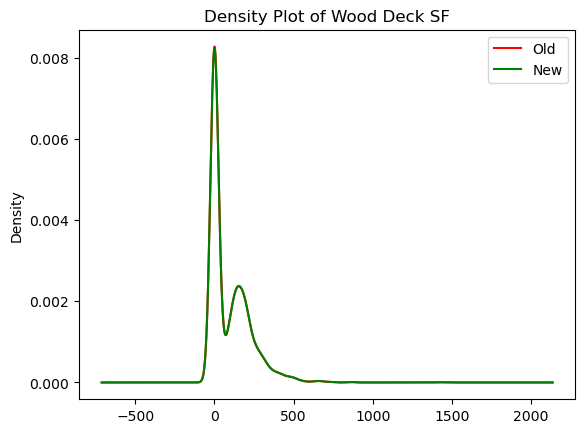

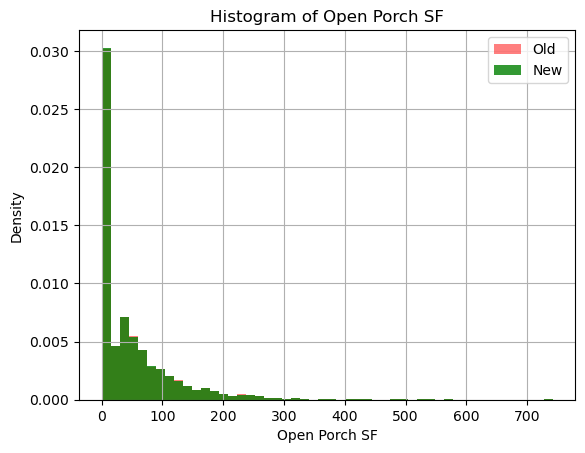

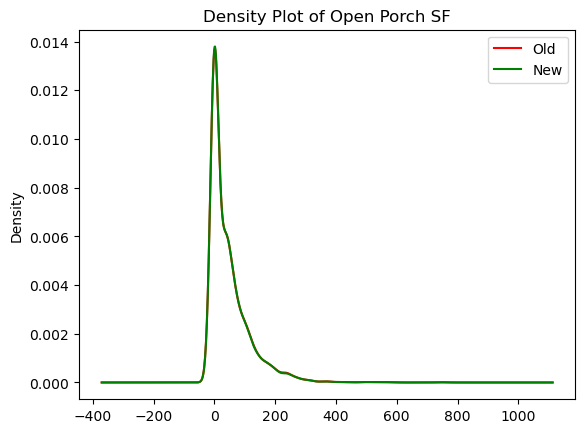

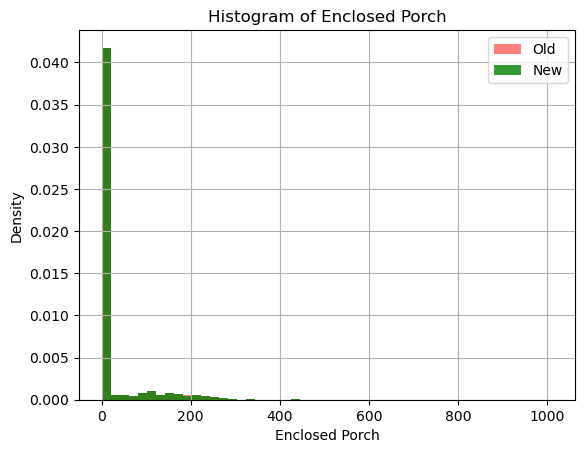

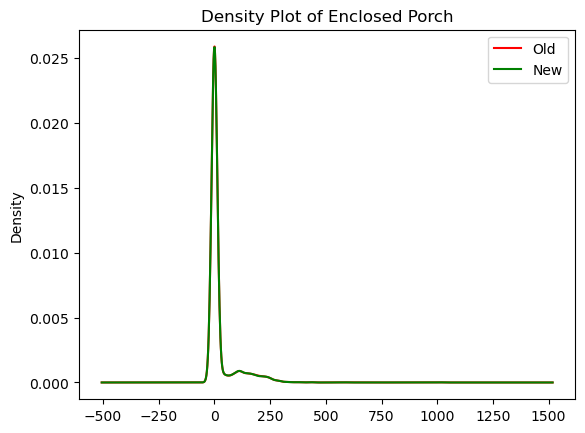

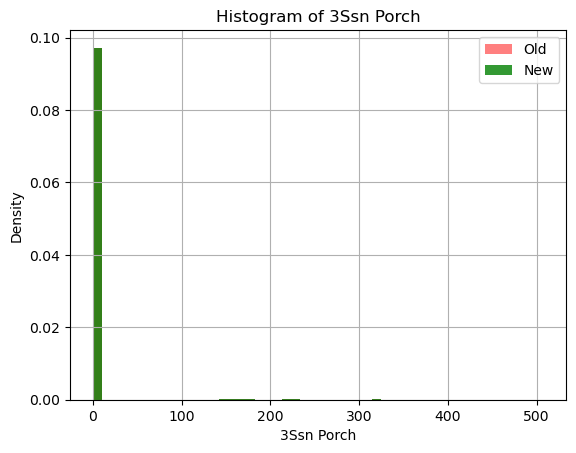

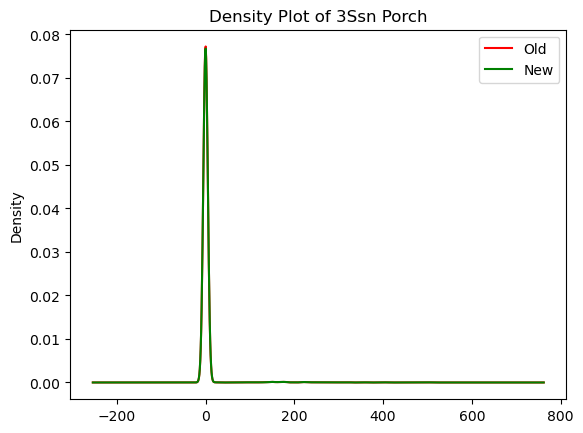

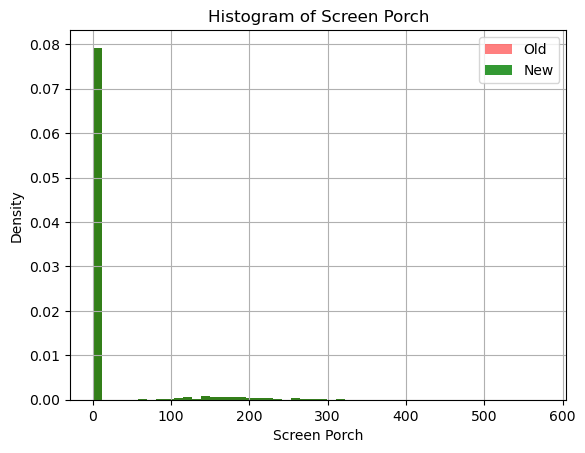

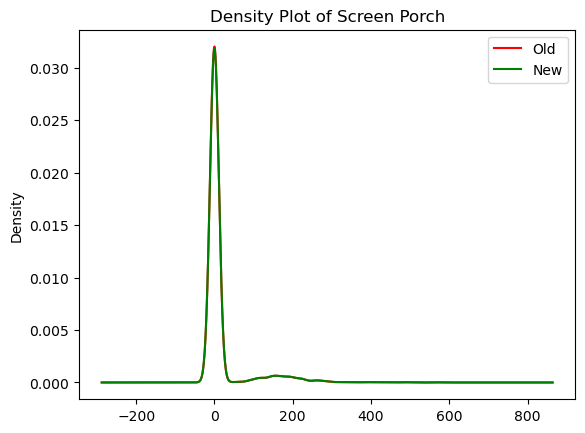

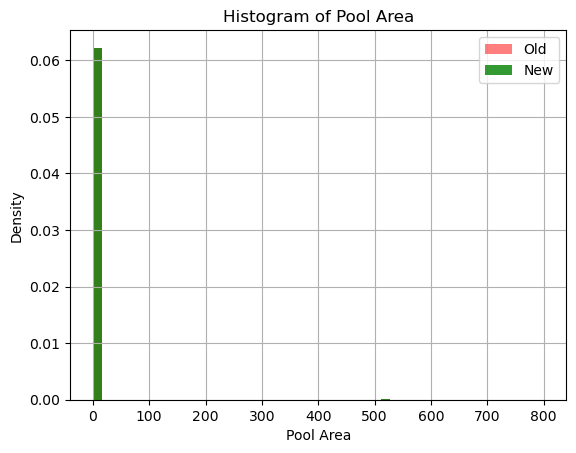

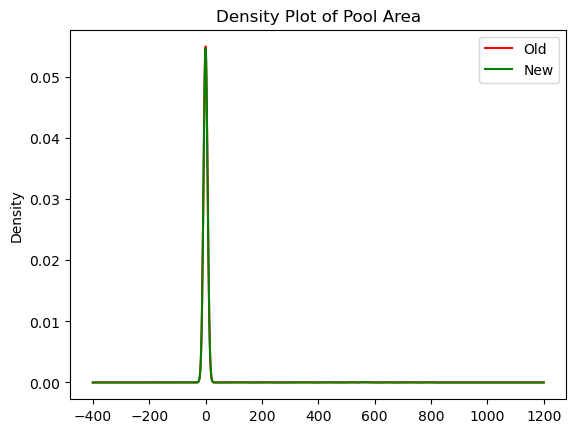

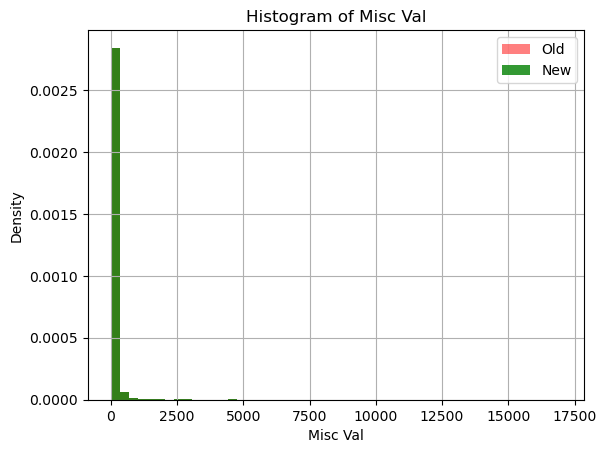

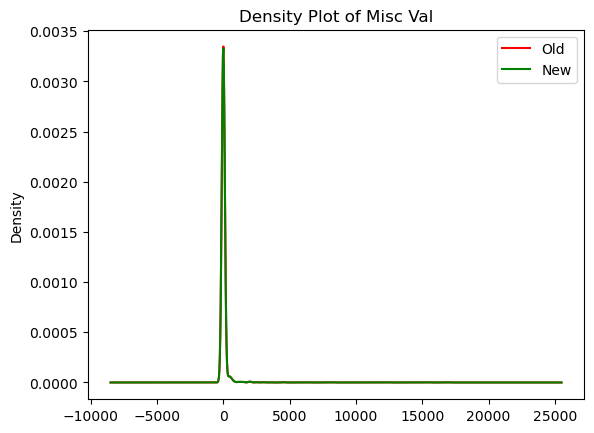

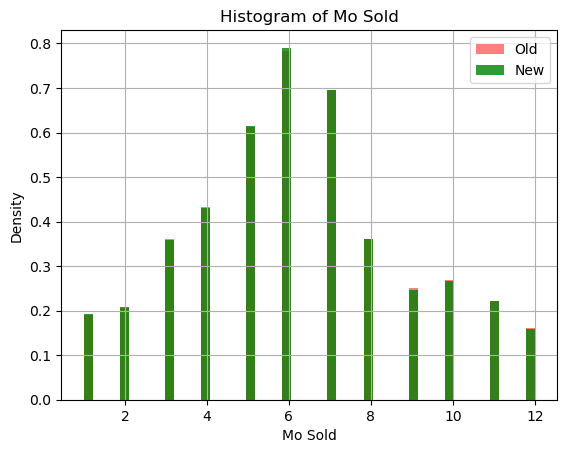

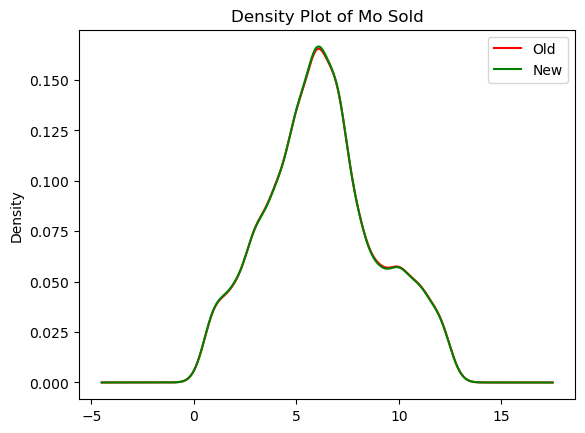

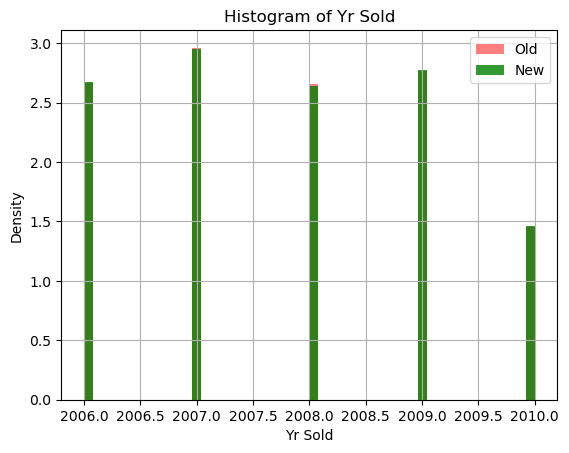

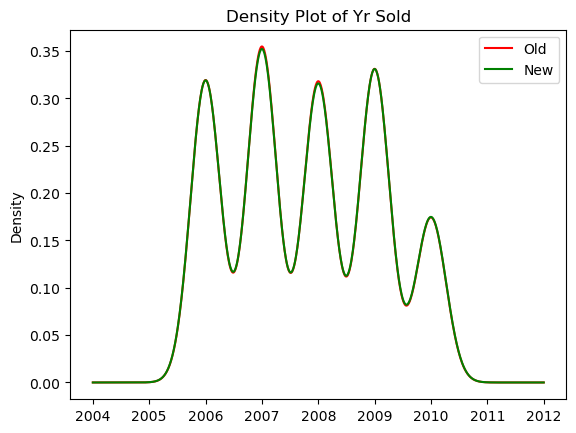

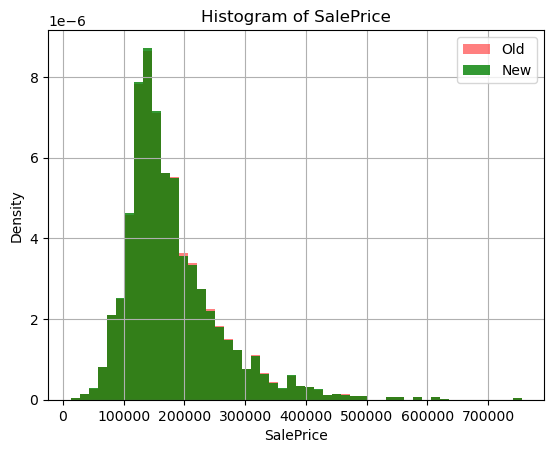

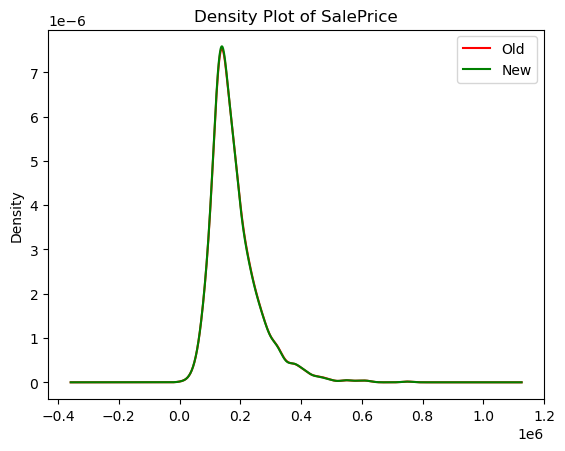

In [14]:
handle_row=HandleMissingDataAnalyzerRow(strategy=HandlingMissingNumericalDataRow())
df=handle_row.execute_analysis(df=df)

In [31]:
df.shape

(2930, 82)

# Insights:
### 1. High Percentage Change:
    a. Many columns exhibit high absolute values of percentage change, particularly for categories with lower frequencies.
    b. Such drastic changes can distort the overall representation of the dataset, potentially leading to biased analyses.

### 2. Potential for Imputation:

    Instead of dropping rows, consider using imputation techniques for categorical data, such as mode imputation or creating a new category (e.g., "Unknown") for missing values. This approach can help retain more data and maintain the integrity of categorical distributions. 
### 3. Conclusion 
    Dropping rows from categorical columns can lead to significant changes that may compromise the dataset's integrity. 
    

In [16]:
st = 'impute'
handle_row.set_strategy(HandlingMissingCategoricalDataRow(strategy=st))
df_impute = handle_row.execute_analysis(df=df)


Categorical Data Columns: ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']
Missing values imputed with the most frequent category.


c:\Users\aarsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


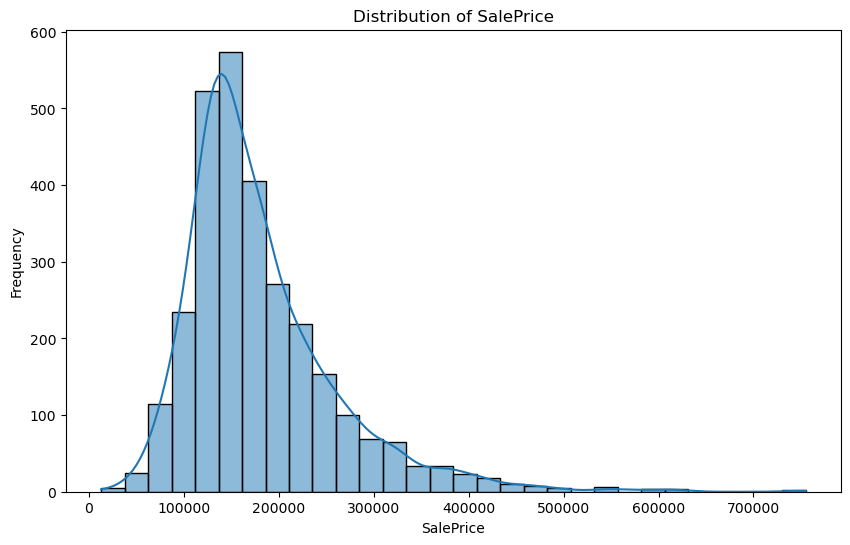

In [32]:
from data_src.univariate_analyse import UnivariateAnalyzer,NumericalUnivariateAnalysis,CategoricalUnivariateAnalysis
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df_impute, 'SalePrice')

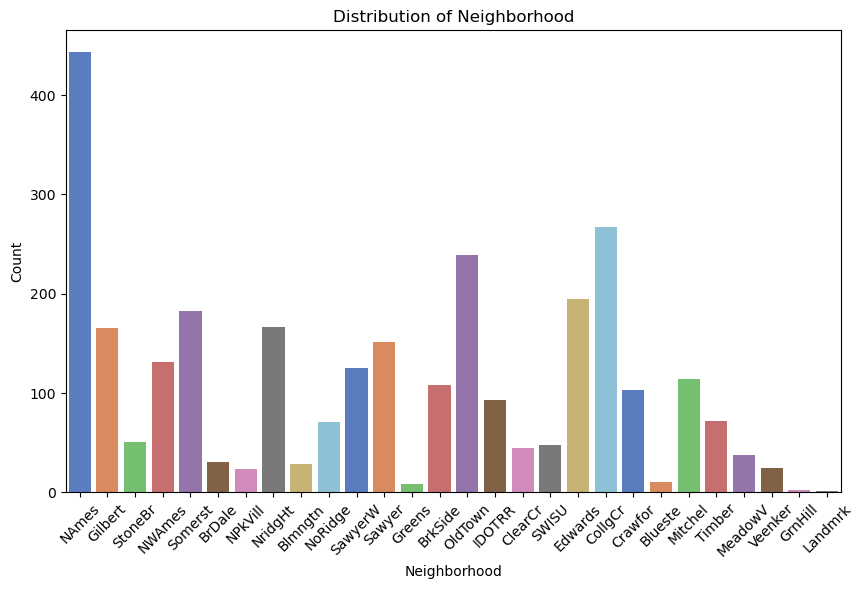

In [33]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Neighborhood')

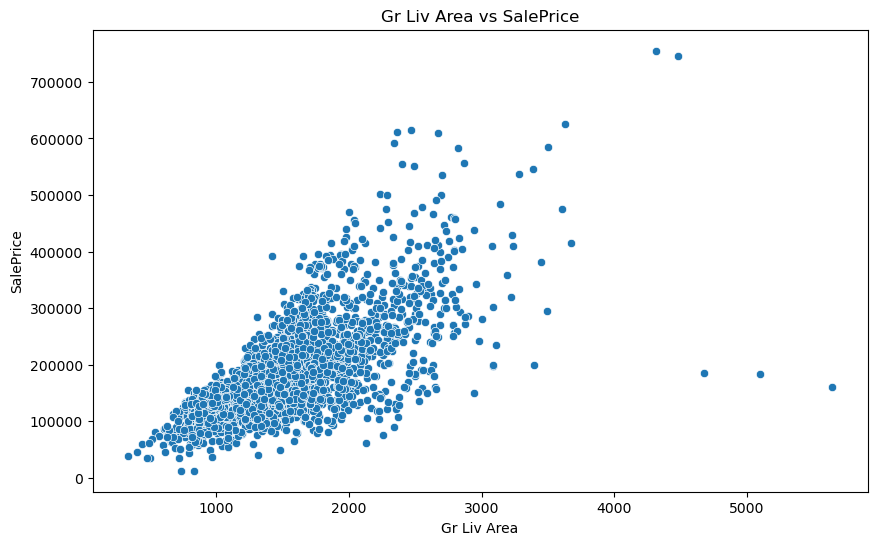

In [34]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df_impute, 'Gr Liv Area', 'SalePrice')


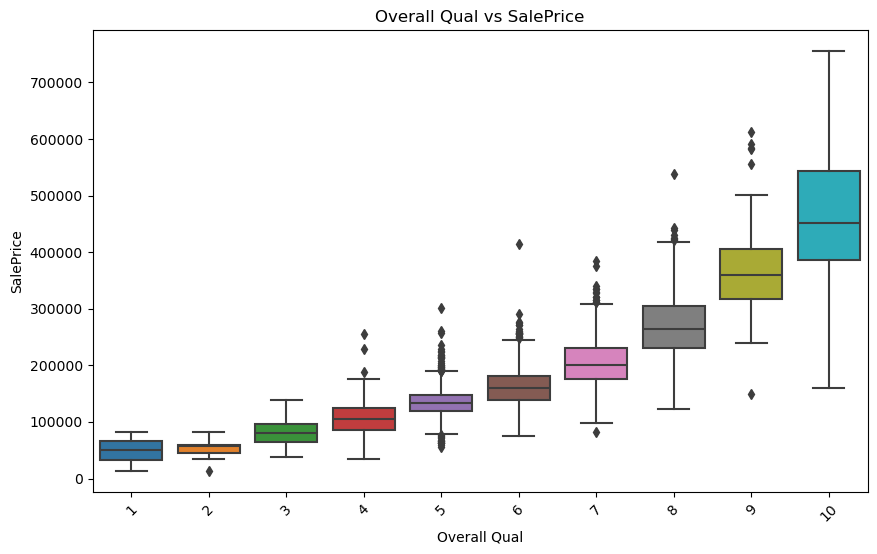

In [35]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df_impute, 'Overall Qual', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**

1. **SalePrice Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `SalePrice` is positively skewed, with the majority of house prices falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   - **Implication**: This skewness suggests that most homes in the dataset are relatively affordable, with fewer high-end properties. The long tail on the right side indicates a small number of more expensive homes, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Neighborhood Distribution (Categorical Feature)**:
   - **Insight**: The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication**: The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

#### **Step 4: Bivariate Analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.

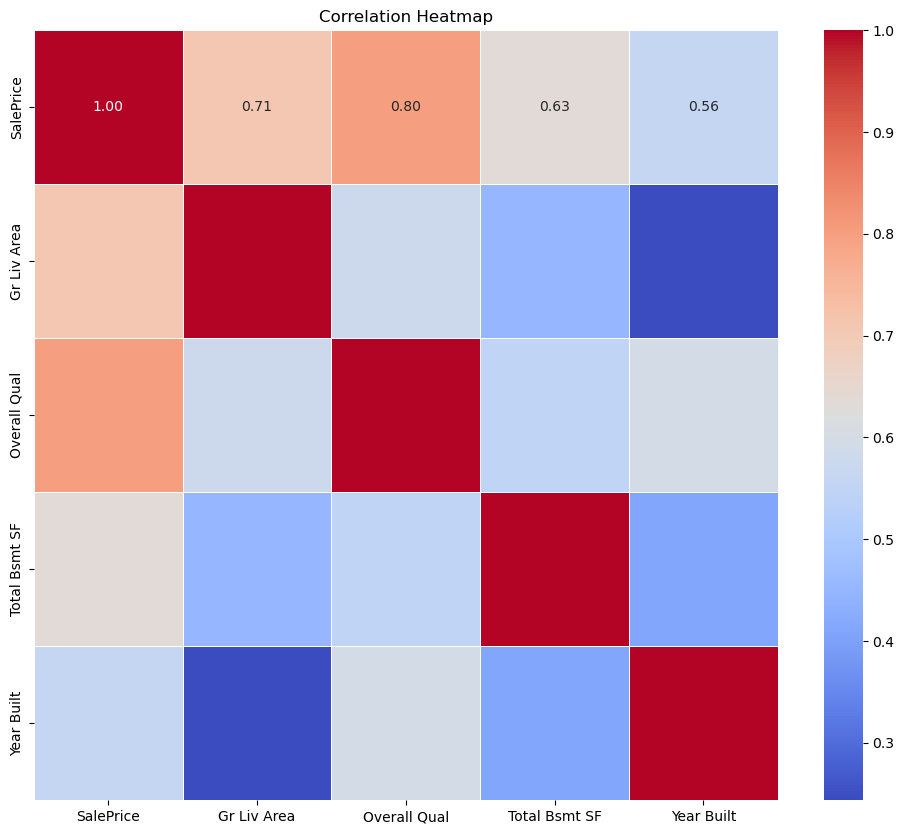

c:\Users\aarsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aarsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aarsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aarsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

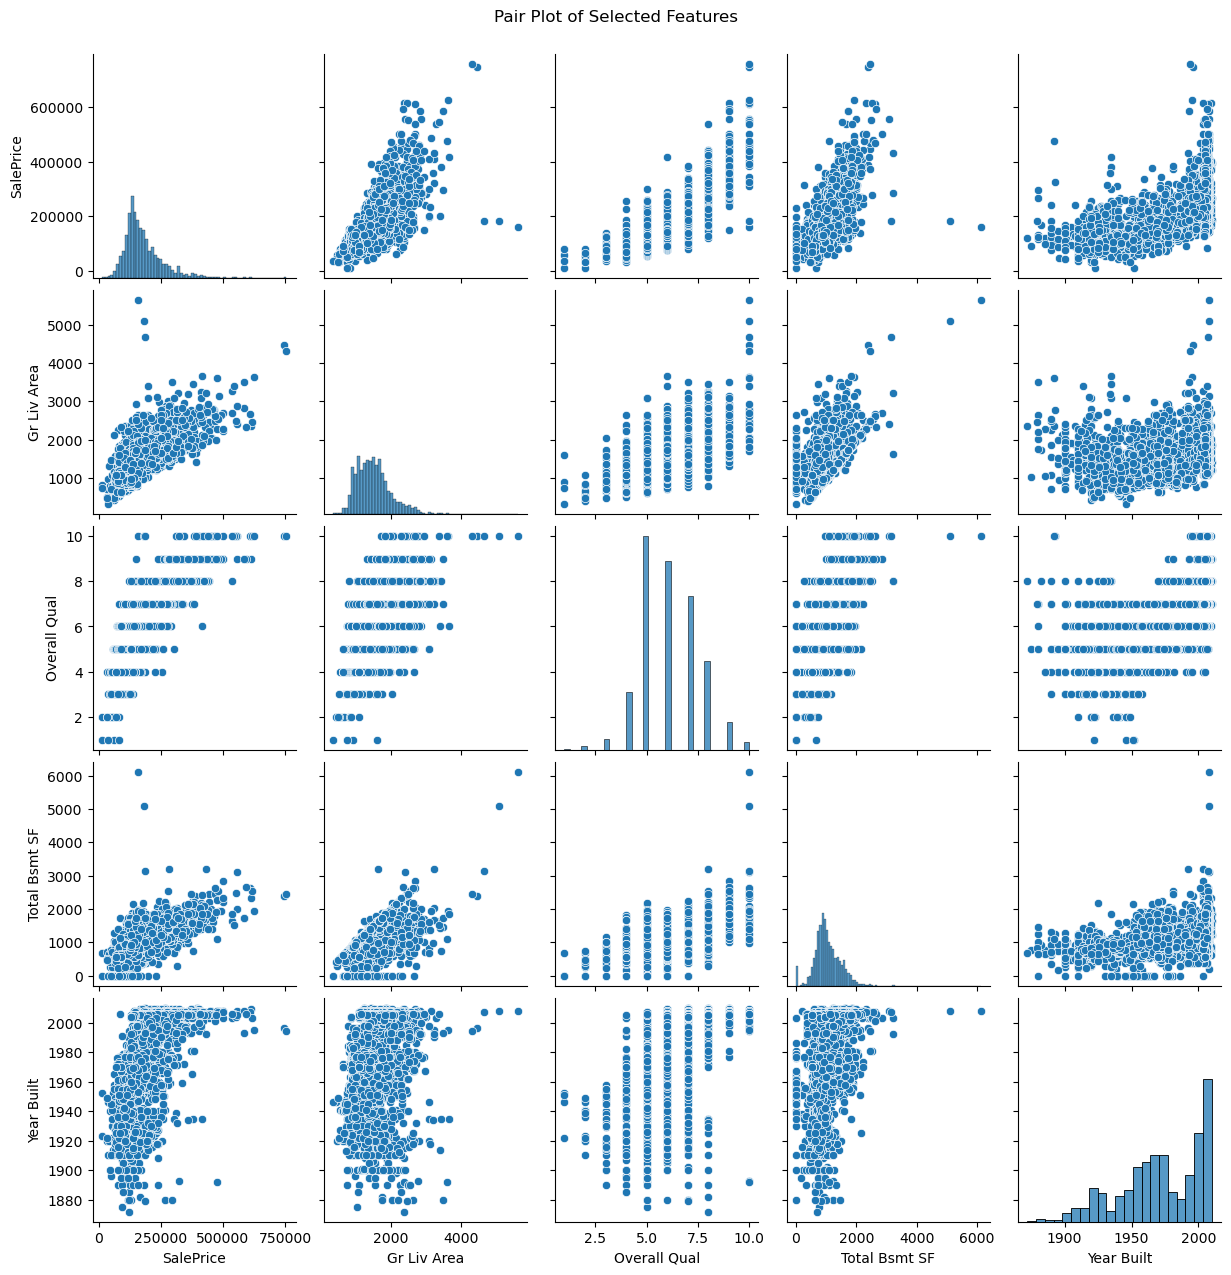

In [36]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df_impute[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)


### **Insights from Multivariate Analysis**

#### **Correlation Heatmap:**
1. **SalePrice and Overall Qual**:
   - **Insight**: The highest correlation observed is between `SalePrice` and `Overall Qual` (0.80). This strong positive correlation indicates that the overall quality of the house is a significant determinant of its price. 
   - **Implication**: `Overall Qual` should be considered a key predictor in the model. The high correlation suggests that this feature explains a substantial portion of the variance in house prices.

2. **SalePrice and Gr Liv Area**:
   - **Insight**: The correlation between `SalePrice` and `Gr Liv Area` (0.71) is also strong, indicating that larger homes generally have higher sale prices.
   - **Implication**: Similar to `Overall Qual`, `Gr Liv Area` is another critical predictor of `SalePrice`. This relationship aligns with the expectation that more living space increases a property's value.

3. **Total Bsmt SF**:
   - **Insight**: The correlation between `Total Bsmt SF` and `SalePrice` (0.63) is moderate, suggesting that the size of the basement contributes to the overall value but not as strongly as living area or quality.
   - **Implication**: `Total Bsmt SF` is an important feature, but it may require further exploration or interaction with other features to capture its full effect.

4. **Year Built**:
   - **Insight**: `Year Built` has a lower correlation with `SalePrice` (0.56). While newer homes tend to sell for more, this relationship is less pronounced than those with living area or quality.
   - **Implication**: The age of the house is a relevant factor but might be more meaningful when combined with other features like `Overall Qual` or `Remod/Add Year`.

#### **Pair Plot:**
1. **Linear Relationships**:
   - **Insight**: The pair plots confirm linear relationships between `SalePrice` and both `Gr Liv Area` and `Total Bsmt SF`, supporting their inclusion as linear predictors in the model.
   - **Implication**: These linear relationships suggest that linear models (or transformations) could effectively capture these predictors' contributions to `SalePrice`.

2. **Discrete Distribution of Overall Qual**:
   - **Insight**: `Overall Qual` appears as a discrete variable in the pair plots, with significant gaps between categories. This suggests that it is more ordinal in nature.
   - **Implication**: Given its ordinal nature, `Overall Qual` might be better treated as a categorical variable with ordered categories. This could improve the interpretability and performance of the model.

3. **Potential Multicollinearity**:
   - **Insight**: The strong correlations between `Gr Liv Area`, `Overall Qual`, and `Total Bsmt SF` suggest potential multicollinearity, which could inflate variance in model coefficients.
   - **Implication**: Multicollinearity should be checked using Variance Inflation Factor (VIF) analysis. If multicollinearity is confirmed, techniques like feature selection, regularization, or Principal Component Analysis (PCA) might be needed.

### **Issues to Address:**
1. **Multicollinearity**:
   - **Issue**: The high correlations between key predictors could lead to multicollinearity in regression models, which could skew the results and reduce model interpretability.
   - **Action**: Conduct VIF analysis to check for multicollinearity. If detected, consider removing or combining correlated features, using regularization techniques, or applying PCA to reduce dimensionality.

2. **Feature Engineering**:
   - **Issue**: Features like `Overall Qual`, which is ordinal, might benefit from specific treatment (e.g., encoding as an ordinal variable) rather than being treated as continuous.
   - **Action**: Consider encoding `Overall Qual` as an ordinal variable. Also, explore interactions between features like `Gr Liv Area` and `Total Bsmt SF` to capture more complex relationships.

3. **Outliers**:
   - **Issue**: The pair plots indicate potential outliers, especially in `Gr Liv Area` and `SalePrice`. These could be high-leverage points that unduly influence model performance.
   - **Action**: Identify and analyze outliers to determine if they should be removed or if the model should be adjusted to account for them (e.g., using robust regression techniques).